In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Steps of Random Forest process:
1. Pick N random records from the dataset.
2. Build a decision tree based on these N records.
3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# draw classification reguions
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 16 14:29:00 2021
Updated on Tue Oct 19 09:00:00 2021

@author: javier.perez-alvaro
"""
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

#### Example 1

In [ ]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=500, noise=0.4, factor=0.1)

plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
# split 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('Accuracy on training set: {:.3f}'.format(accuracy_score(y_train,y_train_pred)))
print('Accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_test_pred)))

In [ ]:
# plot tree
plt.figure(figsize=(10,5))
plot_tree(tree, filled=True, feature_names=['feature #1','feature #2'], fontsize=7, class_names=['0','1'])
plt.show()

In [ ]:
draw_classification_regions(X,y,tree)

In [ ]:
# now try random forest
forest = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=42, n_jobs=-1)

forest.fit(X_train,y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('Accuracy on training set: {:.3f}'.format(accuracy_score(y_train,y_train_pred)))
print('Accuracy on test set: {:.3f}'.format(accuracy_score(y_test,y_test_pred)))

In [ ]:
draw_classification_regions(X,y,forest)

#### Grid Search

In [ ]:
# load iris
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

In [ ]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [46]:
# grid search
param_grid = {'n_estimators': [10,50,100,200,400], 'max_depth': [2,3,4,5], 'min_samples_split': [2,4,8], 'min_samples_leaf': [1,2,4,8]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train,y_train)

print('Best cross-validation accuracy: {:.3f}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test,y_test)))

Best cross-validation accuracy: 0.964
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Test set accuracy: 1.000


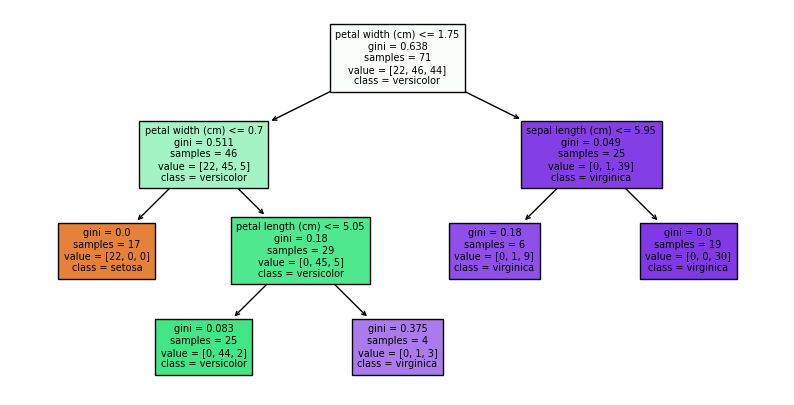

In [47]:
# show best tree
best_tree = grid.best_estimator_.estimators_[0]
plt.figure(figsize=(10,5))
plot_tree(best_tree, filled=True, feature_names=iris.feature_names, fontsize=7, class_names=iris.target_names)
plt.show()

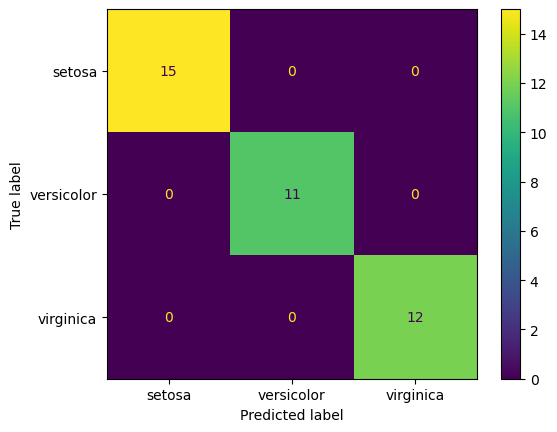

In [49]:
# confusion matrix
y_test_pred = grid.predict(X_test)
cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()